In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
facilities=pd.read_csv("updated_facilities.csv")

In [4]:

cols=["No of Students in Female Schools","No of Students in Male Schools","No of Students in Mixed Schools"]
facilities['Number of Students'] = facilities[cols].sum(axis=1)
facilities= facilities.drop(cols, axis=1)

In [5]:
facilities.head()

,Unnamed: 0,District,No.of Schools,Electricity With,Electricity Without,Drinking Water With,Drinking Water Without,Washroom With,Washroom Without,Boundary Wall With,...,5+ classroom,Black Board,Student Chair,Desk/Bench,Teacher Table,Teacher Chair,Fans,Almirah,Computer,Number of Students
0,1,Badin,2934,875,2059,1298,1636,1595,1339,1447,...,102,5391,8939,41894,5234,11164,6872,3520,1006,408472
1,2,Dadu,1821,931,890,1001,820,1173,648,1223,...,154,4676,4453,43717,4280,9755,6633,1683,190,463932
2,3,Hyderabad,868,634,234,604,264,737,131,747,...,202,5174,13548,40608,4673,11754,10502,2837,335,351476
3,4,Thatta,1282,220,1062,272,1010,786,496,584,...,51,2422,4568,19808,2370,4027,1546,1748,249,163026
4,5,Mirpurkhaas,1998,793,1205,936,1062,1293,705,971,...,101,4820,14515,34503,4669,10275,6717,3247,227,340884


In [6]:
facilities.drop(["District"], axis = 1, inplace = True) 
facilities = facilities.iloc[: , 1:]
output=facilities["Number of Students"]

In [7]:
corr_matrix = facilities.corr()
corr_matrix["Number of Students"]

No.of Schools             0.744169
Electricity With          0.903097
Electricity Without       0.389077
Drinking Water With       0.917801
Drinking Water Without    0.213743
Washroom With             0.841731
Washroom Without          0.525644
Boundary Wall With        0.888001
Boundary Wall Without     0.502734
Laboratory With           0.021114
Laboratory Without        0.738409
Library With              0.362636
Library Without           0.739452
Play Ground With          0.462530
Play Ground Without       0.715549
0 classroom               0.538103
1 classroom               0.464759
2 classroom               0.856254
3 classroom               0.808135
4 classroom               0.919243
5 classroom               0.076532
5+ classroom              0.461289
Black Board               0.867226
Student Chair             0.721021
Desk/Bench                0.738454
Teacher Table             0.895966
Teacher Chair             0.912733
Fans                      0.807685
Almirah             

In [8]:
facilities.drop(["Computer","5 classroom","Laboratory With","Electricity Without"], axis = 1, inplace = True) 

In [9]:
df=np.array(facilities)
output=np.array(output)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = scaler.fit_transform(df)
output=output.reshape(-1, 1)
y = scaler.fit_transform(output)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [10]:
def predict(theta, X):
    y_pred = np.dot(X, theta)
    return y_pred
def squared_loss(y, yhat):
    sum=0
    count=0
    for i in range(len(y)):
        temp=(y[i]-yhat[i])*(y[i]-yhat[i])
        sum+=temp
        count+=1
    return sum/count
    
def abs_loss(y, yhat):
    sum=0
    count=0
    for i in range(len(y)):
        temp=abs(y[i]-yhat[i])
        sum+=temp
        count+=1
    return sum/count
def compute_cost(X, theta, y, loss_func):
    yhat = predict(theta, X)
    if loss_func == "L2": 
      return squared_loss(yhat,y)
    elif loss_func == "L1":
      return abs_loss(yhat,y)
    else:
        return 0
def gradient_for_L2(X,theta,y,m):
    return (X.T.dot(X.dot(theta) - y)) / m
def gradient_for_L1(X,theta,y,m):
    return (X.T.dot(np.sign(X.dot(theta) - y))) / m
def gradient_descent(X, y, theta, alpha, iter_num, loss_func, steps):
    m = len(X)
    history = []

    for i in range(0,iter_num):
        cost=compute_cost(X,theta, y, loss_func)
        if loss_func=="L2": 
          gradient=gradient_for_L2(X,theta,y,m)
        elif loss_func=="L1":
          gradient=gradient_for_L1(X,theta,y,m)
        temp=(alpha*gradient)
        theta=theta-temp
        history.append(cost)
    return history,theta
def function_to_add_bias(arr):
    newarr=[]
    for i in arr:
        i=np.insert(i,0,1)
        newarr.append(i)
    return newarr
X_test=np.array(function_to_add_bias((X_test)))
X_train=np.array(function_to_add_bias((X_train)))

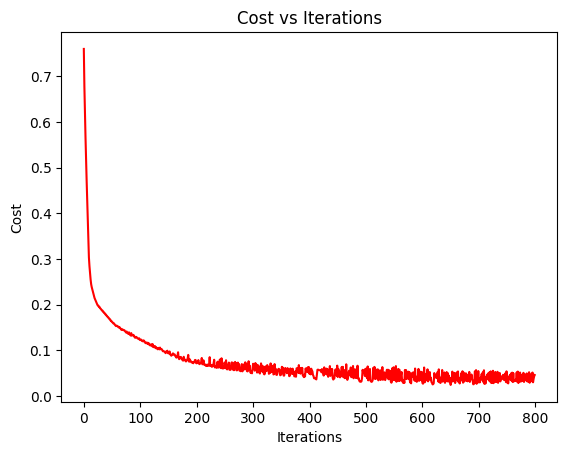

In [11]:
theta =np.array([0]*(df.shape[1]+1)).reshape(28,1)

iter_num = 800
alpha = 0.01
loss_func = "L1" 
steps = 1
cost_history, weights = gradient_descent(X_train, y_train, theta, alpha, iter_num, loss_func, steps)

fig, ax = plt.subplots()
ax.plot(np.arange(iter_num), cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Iterations')
plt.show()

In [12]:
def print_range_15_percent(value):
    fifteen_percent = value*0.30
    lower_bound = value
    upper_bound = value + fifteen_percent
    print(f"Predicted Range : [{lower_bound}, {upper_bound}]")


In [13]:
temp=(facilities.iloc[1])
temp=list(temp)
temp.insert(0,1)
def func(facilities):
    for i in range(21,29):
        temp=(facilities.iloc[i])
        temp=list(temp)
        temp.insert(0,1)
        yhat_train = predict(weights,np.array(temp))
        print_range_15_percent(yhat_train)
        print("original",output[i])
func(facilities)

Predicted Range : [[195105.85020826], [253637.60527074]]
original [247892]
Predicted Range : [[143601.57009584], [186682.04112459]]
original [182256]
Predicted Range : [[153875.51515603], [200038.16970285]]
original [195616]
Predicted Range : [[130928.21550627], [170206.68015815]]
original [166534]
Predicted Range : [[104917.70001721], [136393.01002237]]
original [133450]
Predicted Range : [[120041.94391294], [156054.52708682]]
original [152082]
Predicted Range : [[204620.4832551], [266006.62823163]]
original [258798]
Predicted Range : [[311119.89106944], [404455.85839028]]
original [393074]


In [14]:
theta=weights
yhat_train = predict(weights,X_train)
yhat_test = predict(weights,X_test)

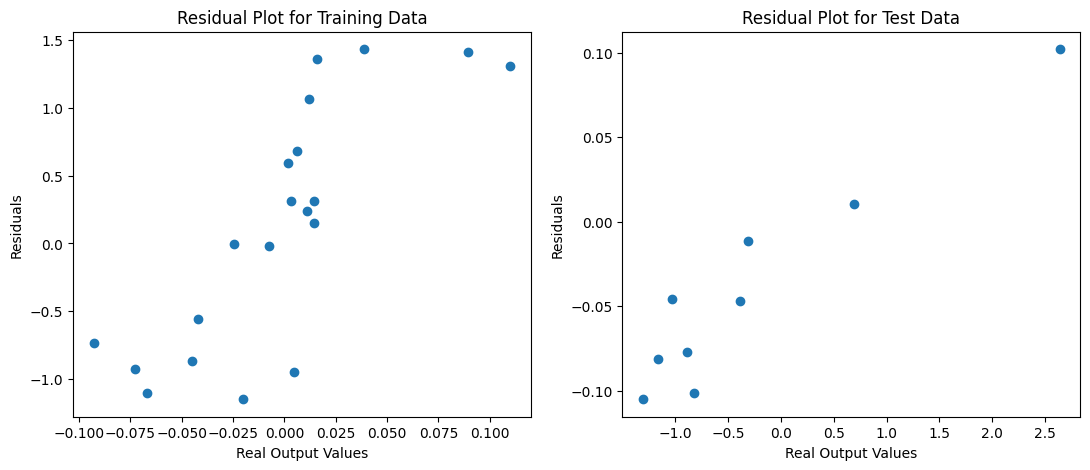

In [15]:
train_residuals = y_train - yhat_train
test_residuals = y_test - yhat_test
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

axs[0].scatter(train_residuals,y_train)
axs[0].set_xlabel('Real Output Values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residual Plot for Training Data')

axs[1].scatter(y_test, test_residuals)
axs[1].set_xlabel('Real Output Values')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residual Plot for Test Data')


plt.show()